In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df['Weekend Return'] = df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'VVM10'])
    df = df.astype(float)

    return df

def rf_grid_search():
    df = encoder(pd.read_csv('proba.csv'))

    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Define the grid of hyperparameters to search
    
    param_grid = {
        'n_estimators': [100, 200, 400],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
}

    model = RandomForestClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Extract the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    test_accuracy = best_model.score(X_test, y_test)
    print("Best Model Parameters:", grid_search.best_params_)
    print("Test Set Accuracy:", test_accuracy)

def main():
    rf_grid_search()

In [3]:
main()

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Model Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Test Set Accuracy: 0.8082191780821918


In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def rf_model():
    df = encoder(pd.read_csv('proba.csv'))

    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the XGBoost model
    model = RandomForestClassifier(max_depth= 3, min_samples_split=5, n_estimators= 100, min_samples_leaf= 2)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    
    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    
    plt.show()
    

def main():
    rf_model()

Accuracy: 0.8082191780821918
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79       326
         1.0       0.77      0.88      0.82       331

    accuracy                           0.81       657
   macro avg       0.81      0.81      0.81       657
weighted avg       0.81      0.81      0.81       657

Confusion Matrix:
[[241  85]
 [ 41 290]]


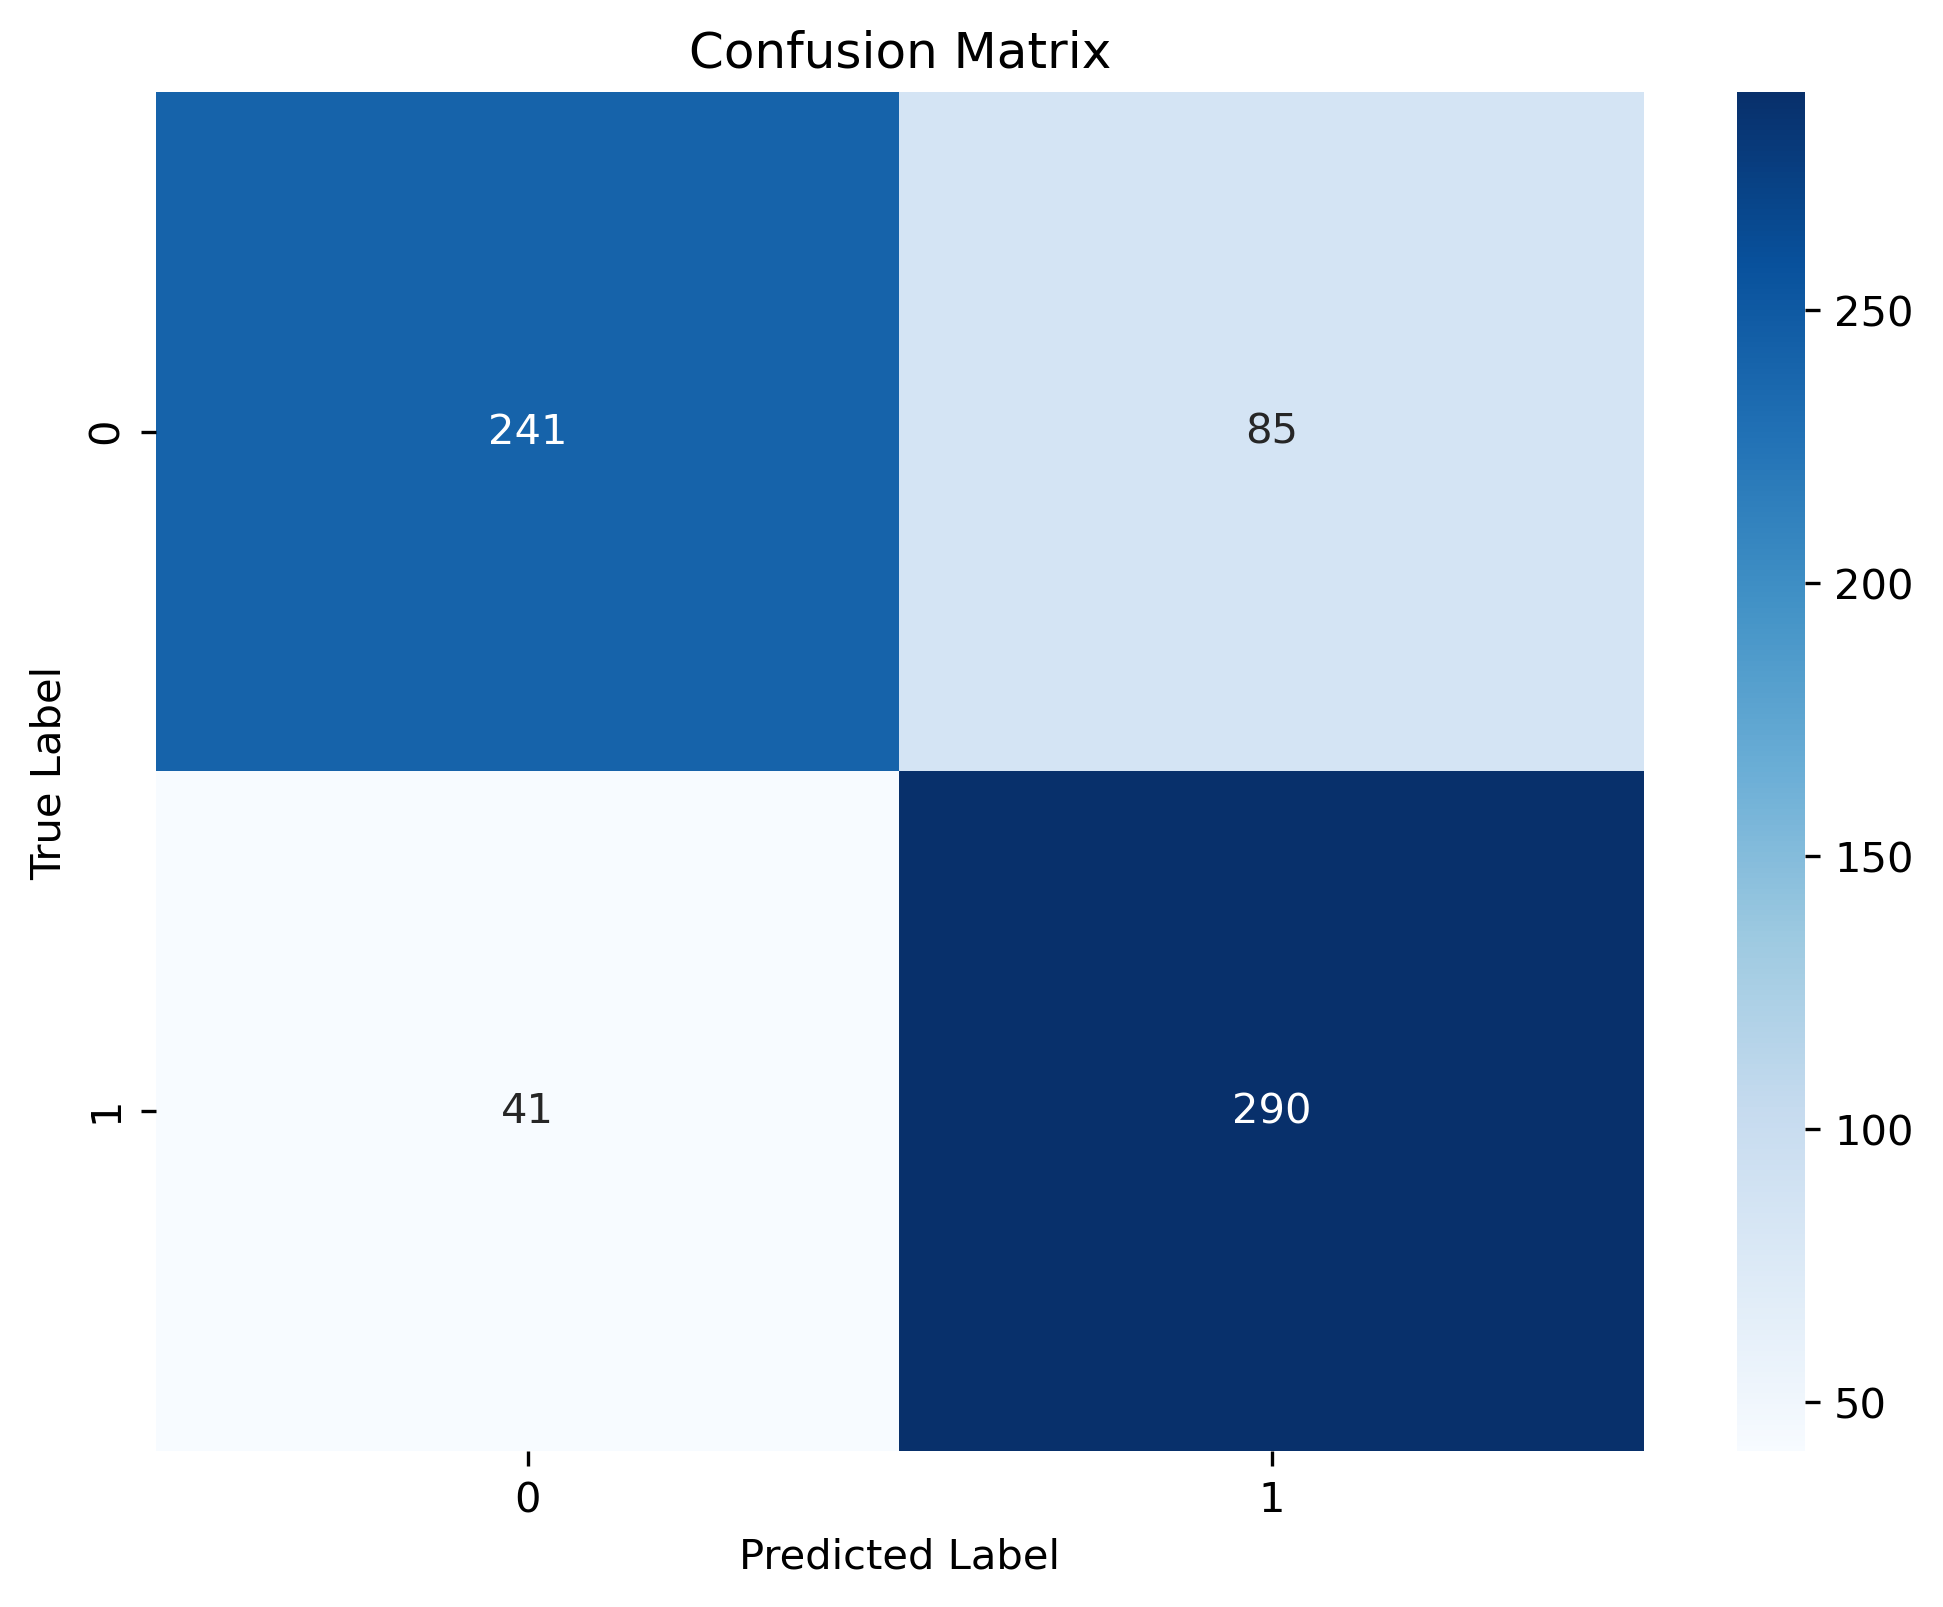

In [5]:
rf_model()